In [2]:
import pandas as pd  # 데이터 처리를 위한 라이브러리

data = pd.read_csv("C:/Users/LIM/OneDrive - gachon.ac.kr/바탕 화면/study/인공지능개론/wine.csv") #컬럼명이 없는 경우 header=None를 해줄 것

data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# 결측치 확인
data.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [6]:
# 'Wine' 컬럼에 몇 종류의 값이 존재하는지 확인
data['Wine'].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [8]:
# 데이터 분리
X = data.drop('Wine', axis=1).values # X (Wine 제외, 입력 데이터)
y = data['Wine'].values # y (Wine, 정답 데이터)

In [10]:
X # 데이터 확인

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [12]:
y #데이터 확인

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split  # 데이터 분할 라이브러리

# 8:2 비율로 훈련 데이터와 테스트 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


Linear Regression MSE: 0.11926651196023681


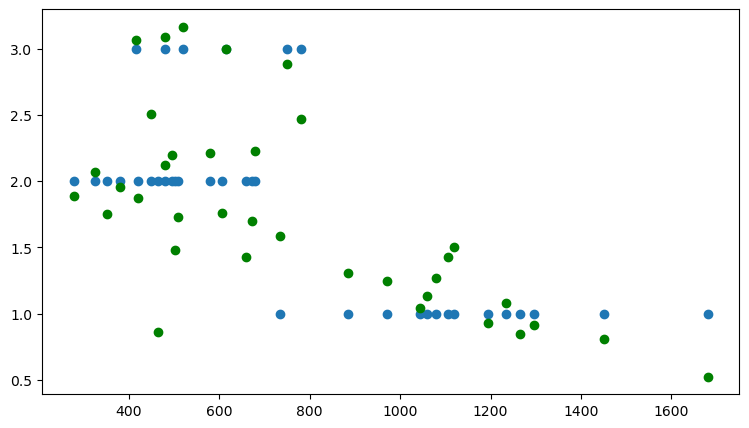

In [28]:
#LinearRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)
lr_preds = model.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(lr_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], lr_preds, c="g", label='lr_preds')
plt.show()

DecisionTreeRegressor MSE: 0.08333333333333333


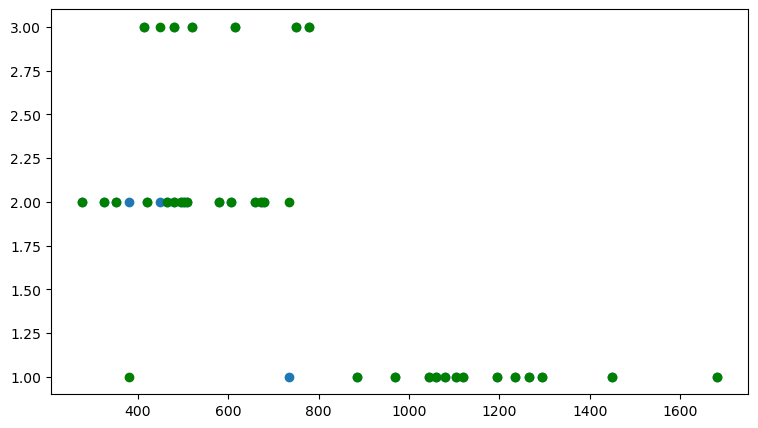

In [30]:
#DecisionTree
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dt_preds = model.predict(X_test)

print("DecisionTreeRegressor MSE:", mean_squared_error(dt_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], dt_preds, c="g", label='dy_preds')
plt.show()

RandomForestRegressor MSE: 0.038430555555555565


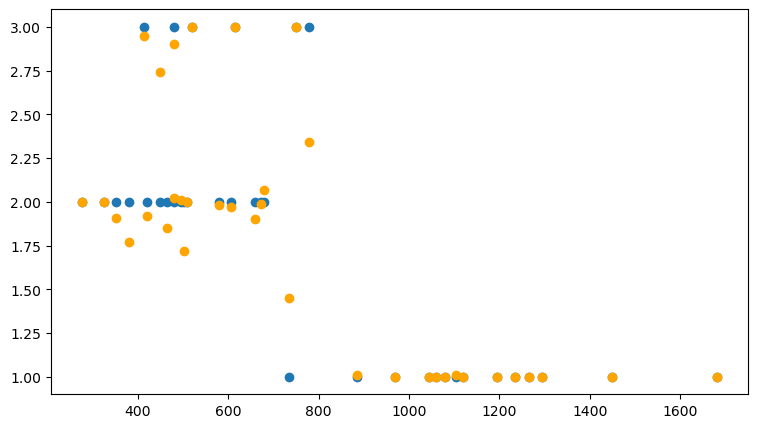

In [32]:
#RandomForest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
rf_preds = model.predict(X_test)

print("RandomForestRegressor MSE:", mean_squared_error(rf_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], rf_preds, c="orange", label='rf_preds')
plt.show()

SVR MSE: 0.059716666666666654


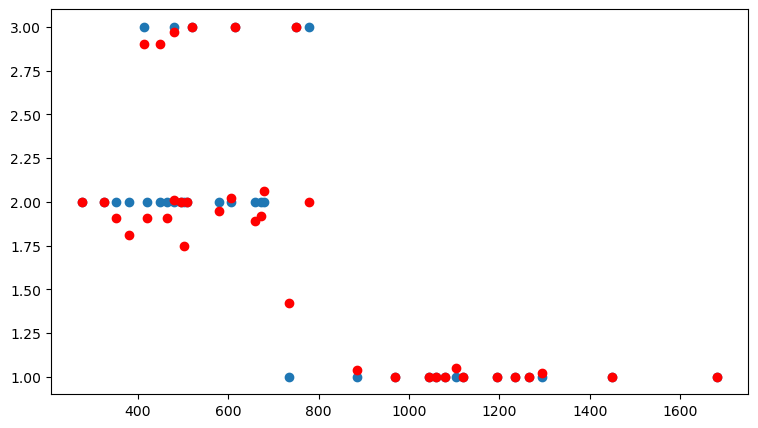

In [34]:
#SVR
from sklearn.svm import SVR
model = RandomForestRegressor()
model.fit(X_train, y_train)
svr_preds = model.predict(X_test)

print("SVR MSE:", mean_squared_error(svr_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test[:, -1], y_test, label="y_test")
plt.scatter(X_test[:, -1], svr_preds, c="r", label='svr_preds')
plt.show()